## Analisis Data 

In [25]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [26]:
data = pd.read_excel("hehe/dataset.xlsx").drop(['Unnamed: 0'],axis=1)

In [27]:
data.head()

,Akun Twitter,Tweet,MBTI,Temp,Following,Followers,Jumlah tweet,introvert,extrovert,sensing,intuitive,feeling,thinking,judging,perceiving
0,Abdurrachman181,Bisa aje bapak wkwkwkwk. Yuk pak kayaknya ini...,ESFP,Melankolis,396,356,15500,0,1,1,0,1,0,0,1
1,abenksepeda,Throwback pic.twitter.com/IxDTb7zydF Bro fork...,ISTJ,Koleris,164,835,3277,1,0,1,0,0,1,1,0
2,admiralabdullah,MonKaS https://www.cnnindonesia.com/ekonomi/2...,ESTP,Sanguinis,314,315,842,0,1,1,0,0,1,0,1
3,alyasuwandi,Semoga Allah segera menyatukn langkahku & lan...,ENFP,Sanguinis,809,221,95,0,1,0,1,1,0,0,1
4,amaliaaaptr,"Aww syg bgt ðŸ–¤ Besok tgl 15 kak, kn hr ini ...",ISFP,Melankolis,158,61,371,1,0,1,0,1,0,0,1


In [28]:
data.shape

(97, 15)

In [29]:
label_size0 = []
label_size1 = []

for i in data.columns[7:]:
    label_size0.append(len(data[data[i]==0]))
    label_size1.append(len(data[data[i]==1]))

In [30]:
dat_anls = pd.DataFrame({
    'label' : data.columns[7:],
    'negative' : label_size0,
    'positive' : label_size1
})

dat_anls = dat_anls.set_index(['label'], drop=True)

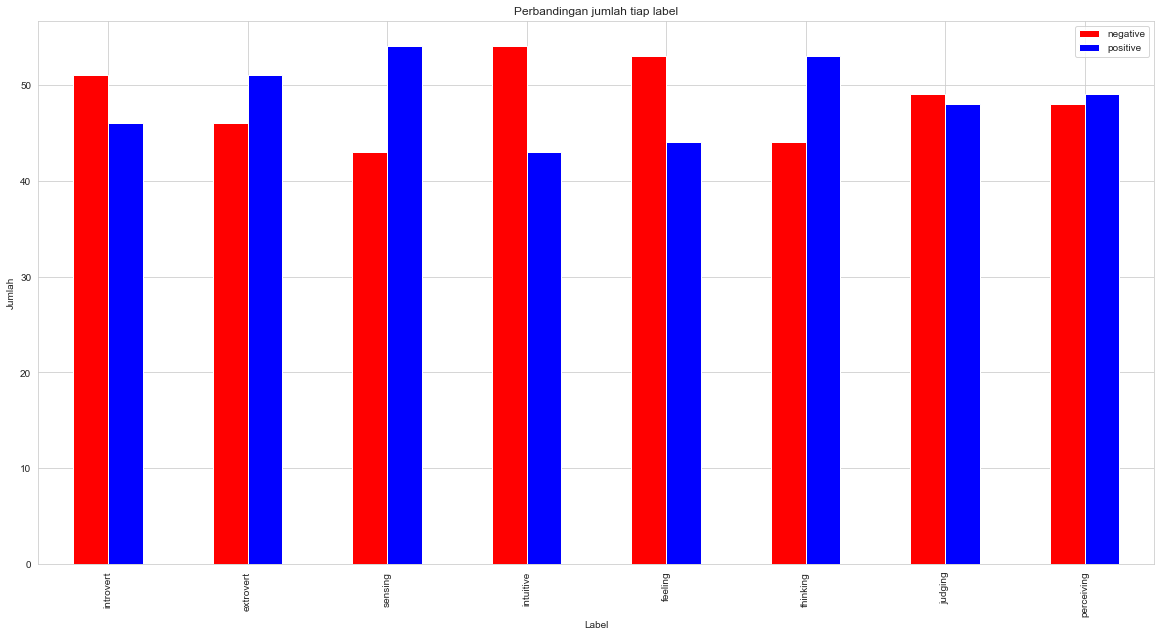

In [31]:
dat_anls.loc[:,['negative','positive']].plot.bar(color=['red','blue'], figsize=(20,10))
plt.title("Perbandingan jumlah tiap label")
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

### Perbandingan Jumlah Tiap Label (MBTI) 

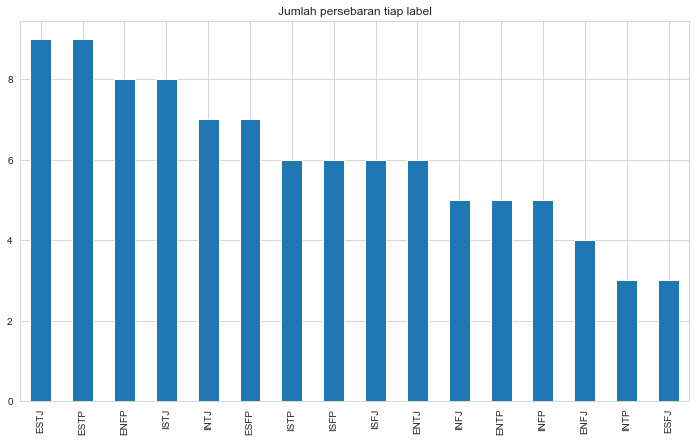

In [32]:
data['MBTI'].value_counts().plot(kind='bar',figsize=(12,7),title="Jumlah persebaran tiap label")

### Analisis Fitur 

#### Temprament 

##### Perbandingan Jumlah Temprament 

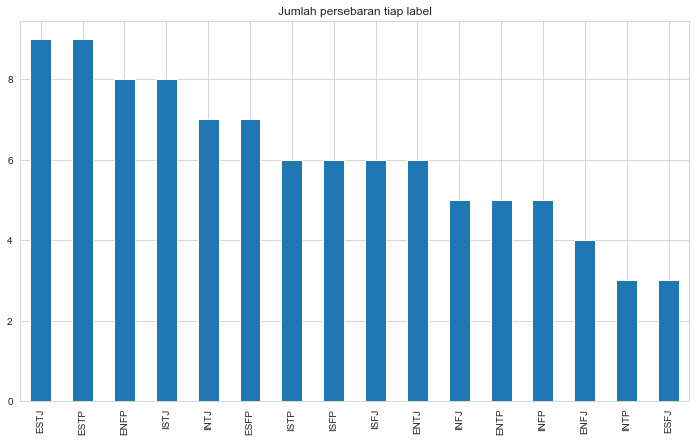

In [33]:
data['MBTI'].value_counts().plot(kind='bar',figsize=(12,7),title="Jumlah persebaran tiap label")

##### Jumlah Temprament per Label 

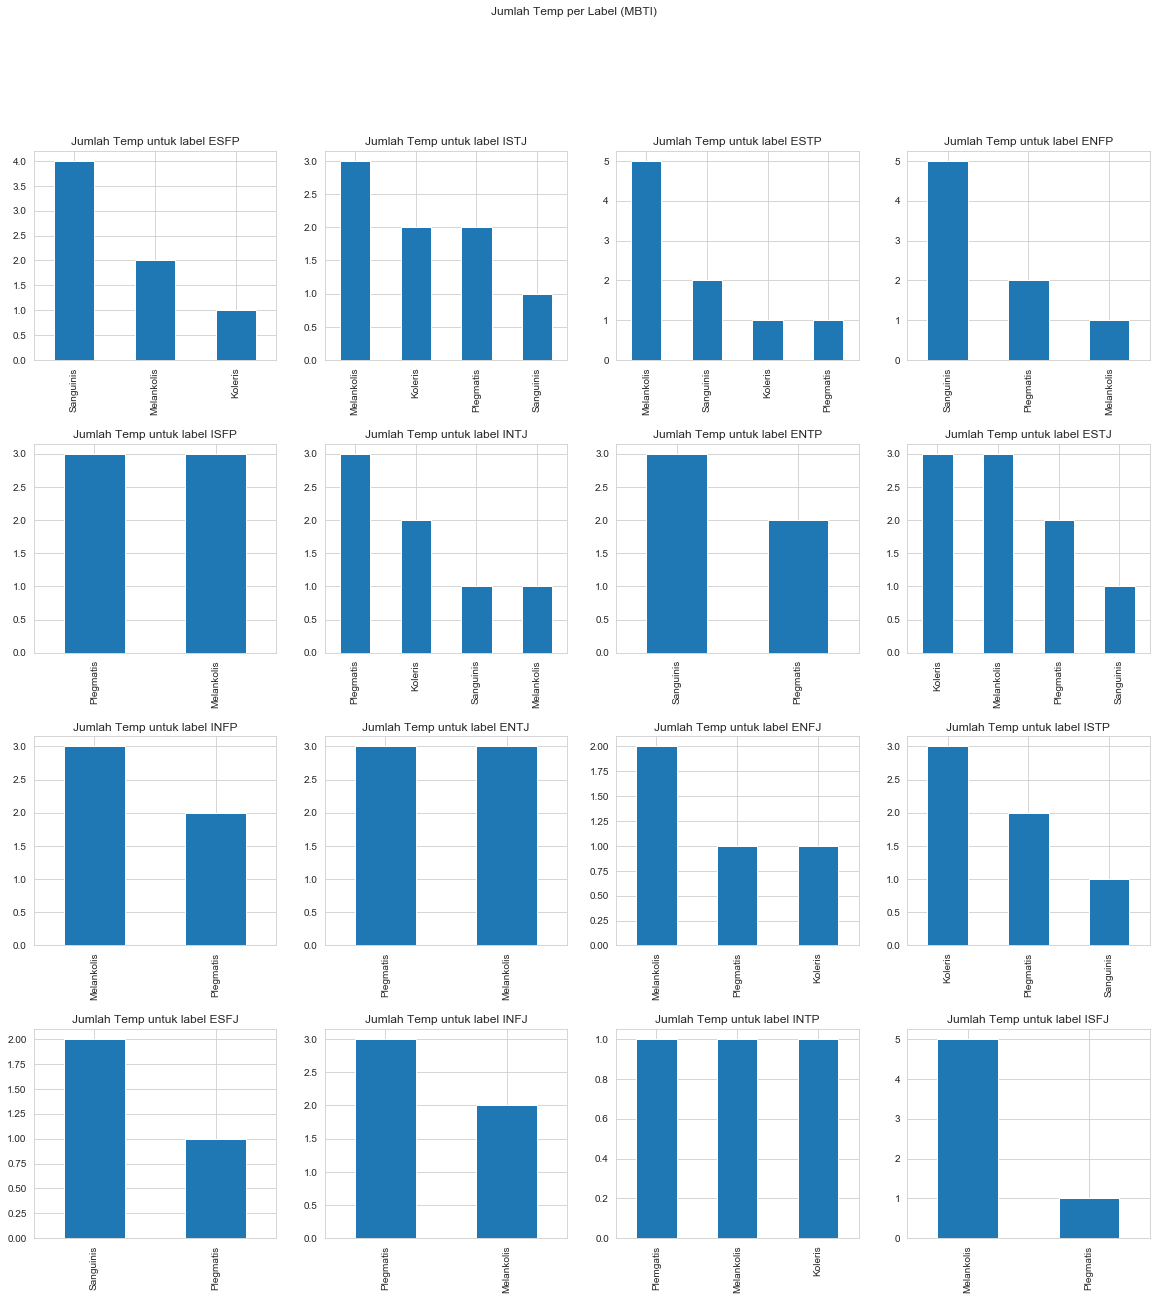

In [34]:
label = data["MBTI"].unique()

plt.figure(figsize=(20,20))
plt.suptitle('Jumlah Temp per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    data[data["MBTI"]==label[i]]['Temp'].value_counts().plot(kind='bar')
    title='Jumlah Temp untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

#### Following 

##### Distribusi jumlah following 

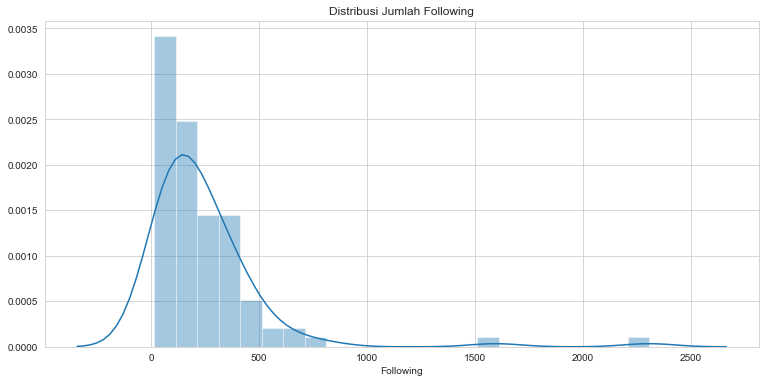

In [35]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['Following']).set_title('Distribusi Jumlah Following');

##### Distribusi jumlah following per Label(MBTI) 

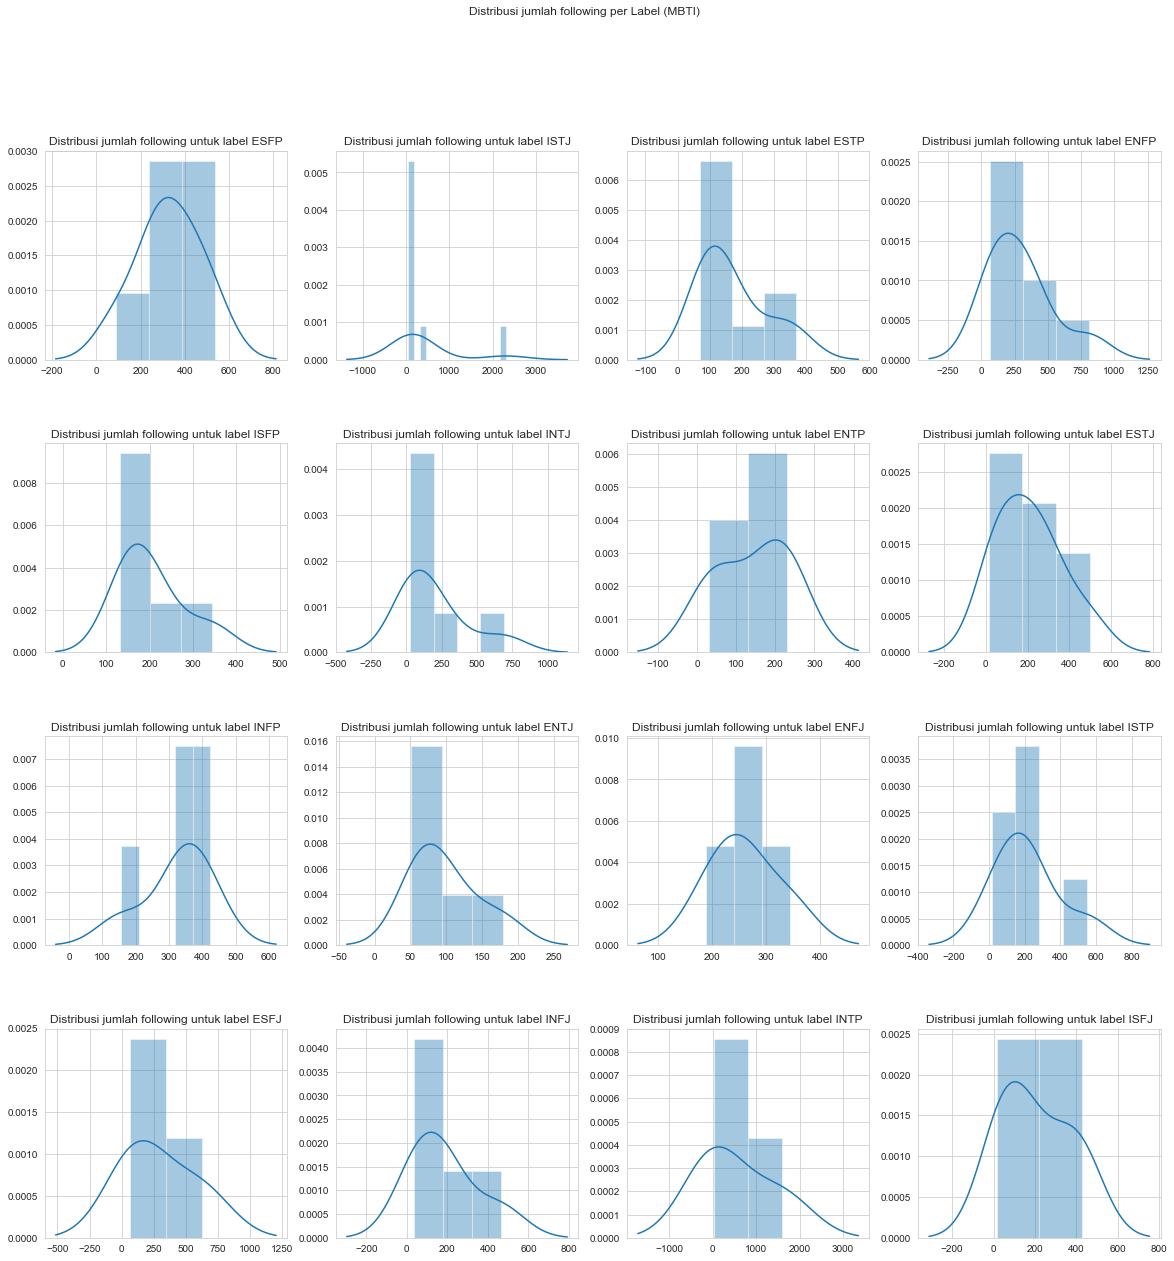

In [36]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah following per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data[data['MBTI']==label[i]]['Following'])
    title='Distribusi jumlah following untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

#### Followers 

##### Distribusi jumlah followers 

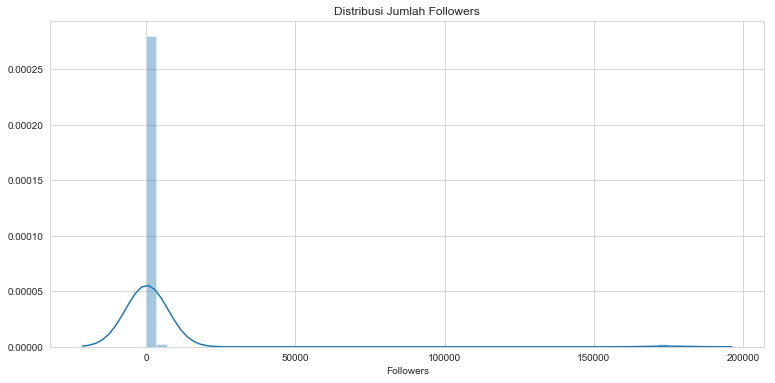

In [37]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['Followers']).set_title('Distribusi Jumlah Followers');

##### Distribusi jumlah followers per label 

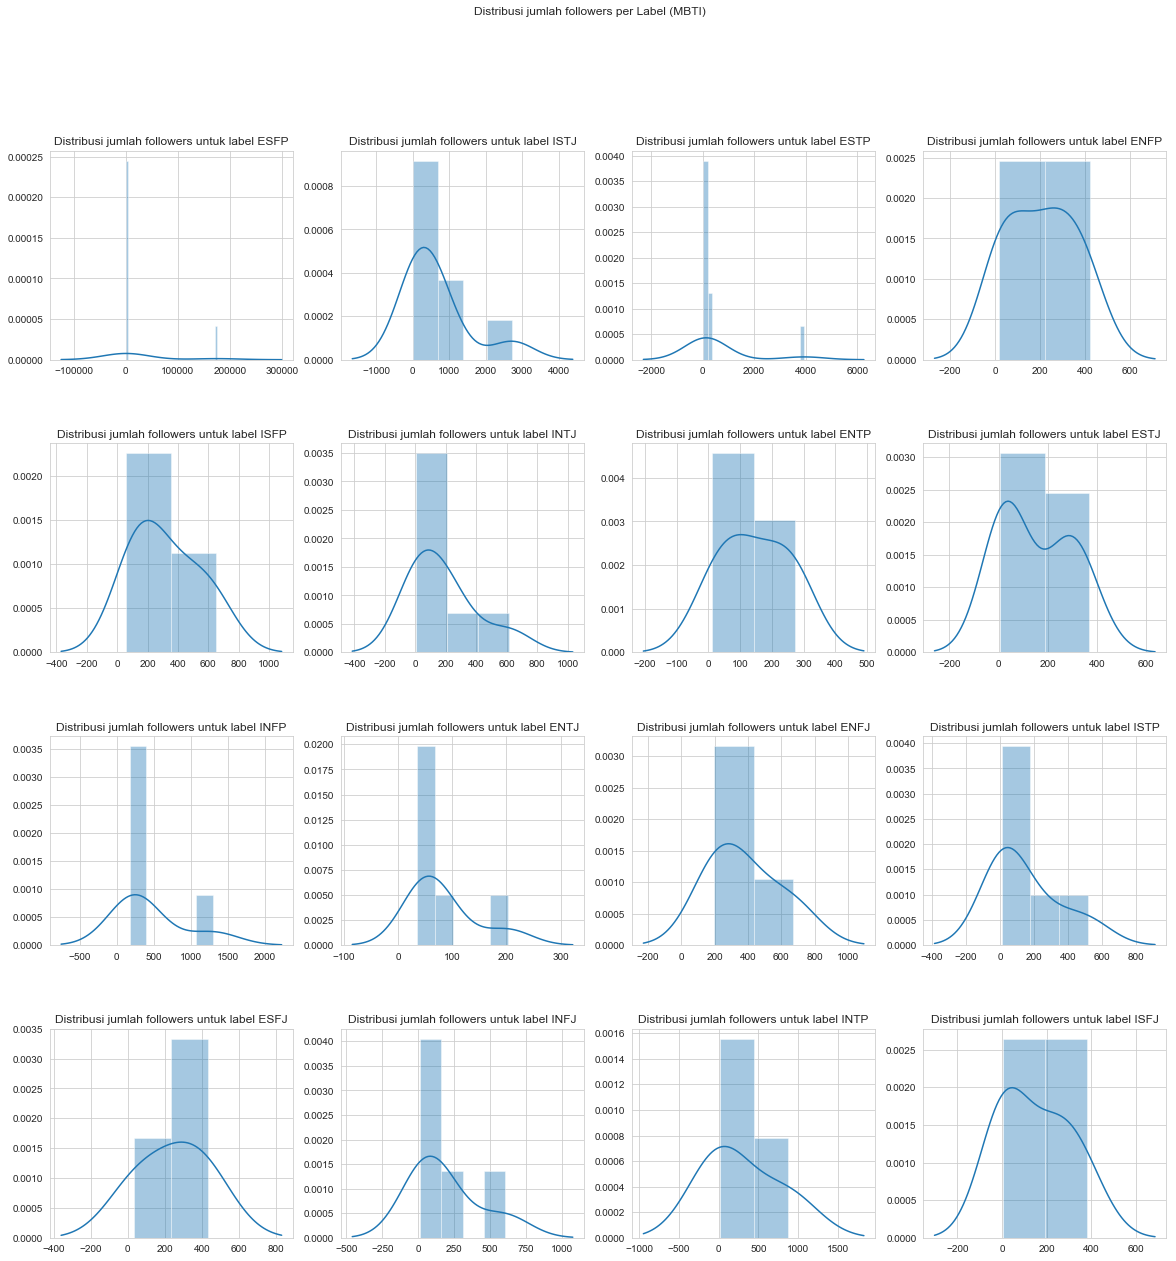

In [38]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah followers per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data[data['MBTI']==label[i]]['Followers'])
    title='Distribusi jumlah followers untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

#### Jumlah Tweet 

##### Distribusi jumlah tweet 

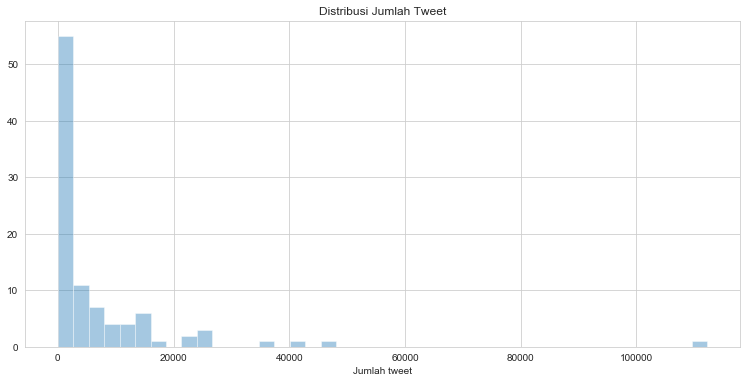

In [39]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['Jumlah tweet'],kde=False).set_title('Distribusi Jumlah Tweet');

##### Distribusi jumlah tweet per label (MBTI) 

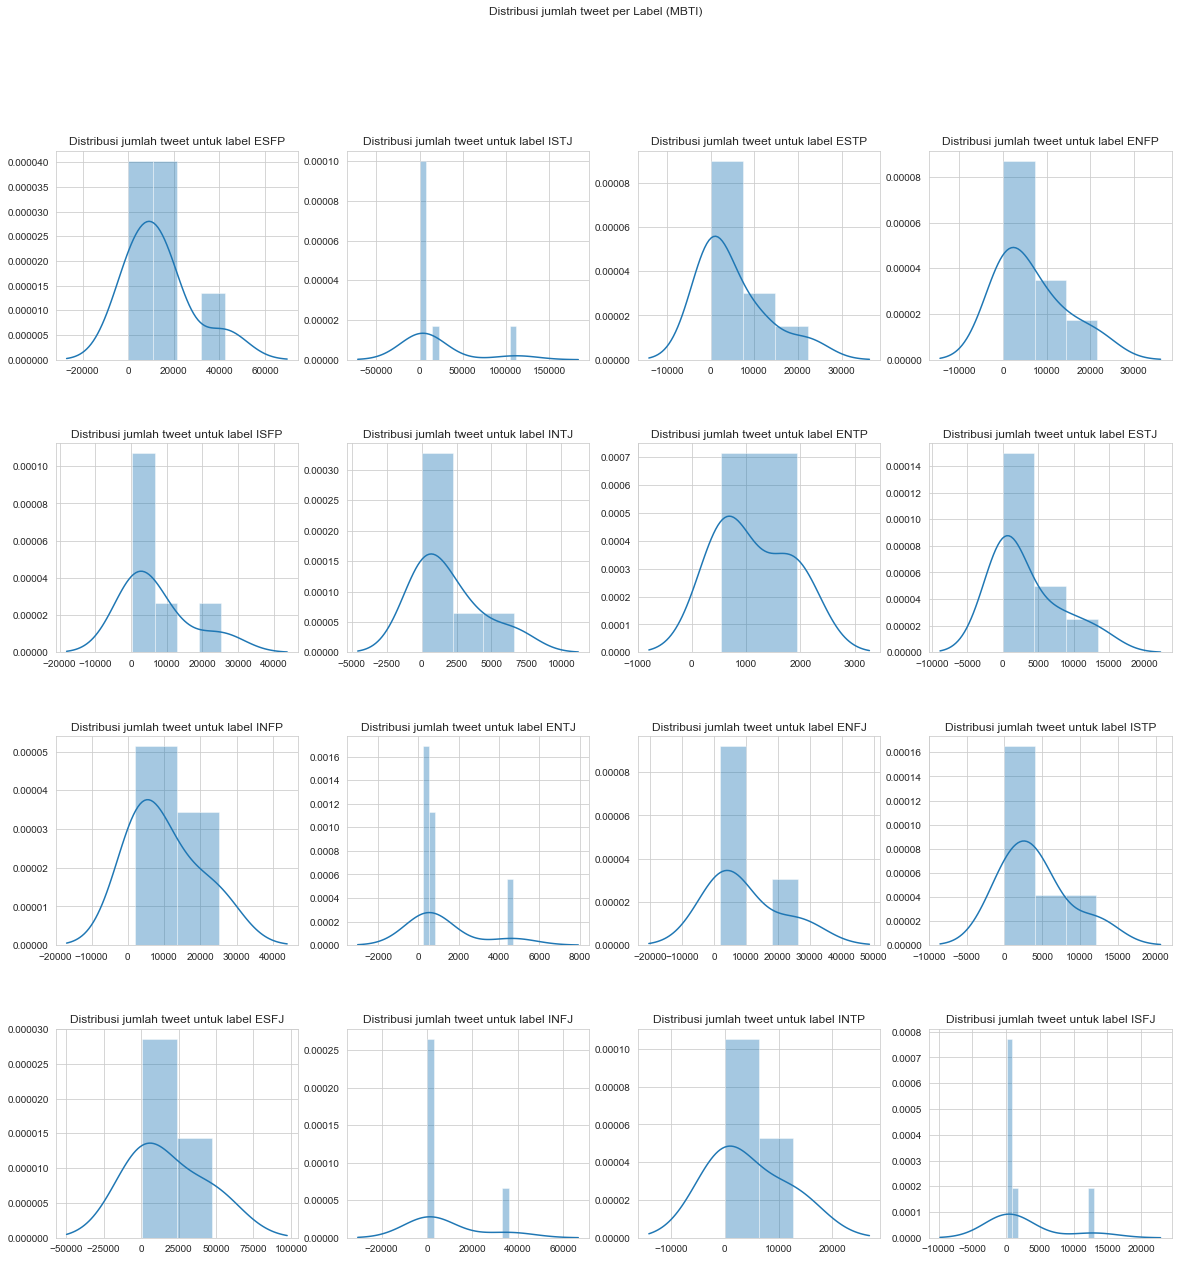

In [40]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribusi jumlah tweet per Label (MBTI)')
for i in range (len(label)):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.4)
    sns.distplot(data[data['MBTI']==label[i]]['Jumlah tweet'])
    title='Distribusi jumlah tweet untuk label '+str(label[i])
    plt.title(title)
    plt.xlabel("")

#### Tweet 

##### Persebaran panjang tweet (Char Based) 

In [46]:
data_anl_ = data[["Tweet"]].copy()

In [48]:
data_anl_ = data[['Tweet', 'introvert', 'extrovert', 'sensing', 'intuitive','feeling','thinking','judging','perceiving']].copy()

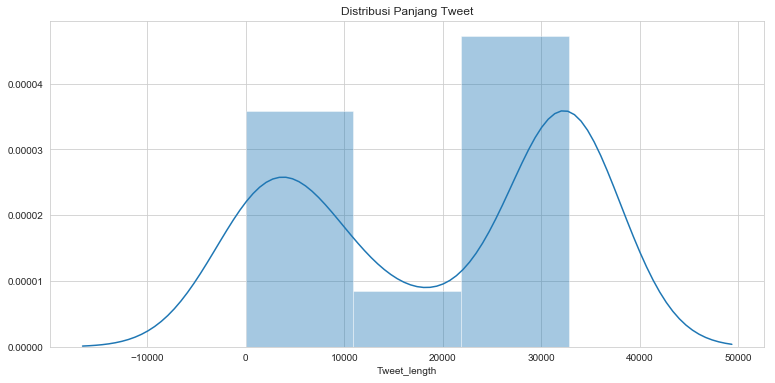

In [42]:
data_anl_['Tweet_length'] = data_anl_['Tweet'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['Tweet_length']).set_title('Distribusi Panjang Tweet');

##### Distribusi panjang tweet (Word Based) 

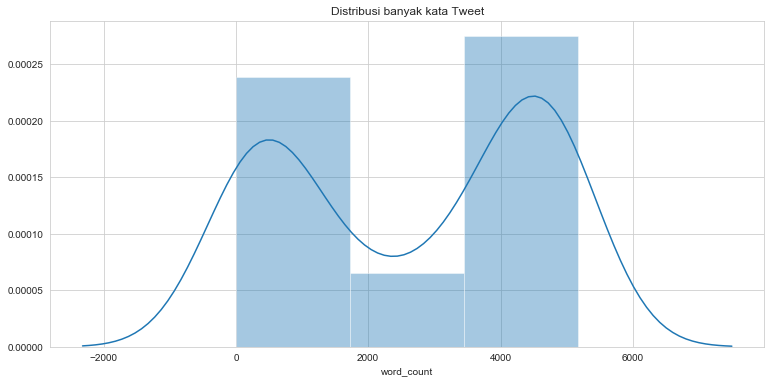

In [43]:
data_anl_['word_count'] = data_anl_['Tweet'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['word_count']).set_title('Distribusi banyak kata Tweet');

### Top 20 Words 

In [44]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

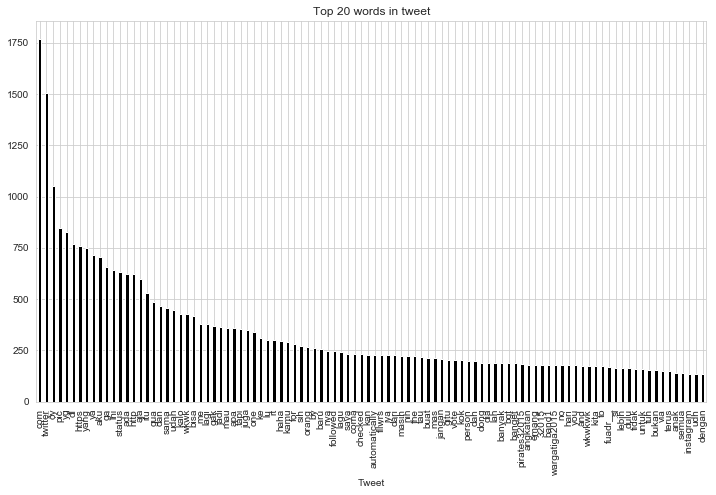

In [52]:
common_words = get_top_n_words(data_anl_[data_anl_["introvert"] == 1]["Tweet"], 100)
# for word, freq in common_words:
#     print(word, freq)
topWord = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topWord.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 words in tweet', figsize=(12,7))

### Top 20 Bigram 

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_bigram(data_anl_['Tweet'], 20)
# for word, freq in common_words:
#     print(word, freq)
topbigram = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topbigram.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet', figsize=(12,7))